# Goal
- 이미지에서 Fourier transform을 이용하여 주파수 영역에서의 특징을 추출합니다.
- Fourier Transform은 화소의 밝기의 변화가 얼마나 빨리 변화하느냐를 고주파와 저주파로 분류
- numpy를 사용하여 이미지의 Fourier transform을 계산합니다.
- cv.dft(), cv.idft()

# Theory
Fouier Transform은 시간 영역의 신호를 주파수 영역으로 변환하는 방법입니다. OpenCV는 cv.dft() 함수를 사용하여 Fourier Transform을 계산합니다. 이 함수는 입력 이미지의 크기가 2의 거듭제곱이어야 합니다. 따라서 입력 이미지의 크기가 5x5이면, 8x8로 패딩을 해야 합니다. 그렇지 않으면, cv.getOptimalDFTSize() 함수를 사용하여 가장 가까운 2의 거듭제곱 크기로 패딩할 수 있습니다. cv.dft() 함수는 결과로 복소수 배열을 반환합니다. 이 배열의 첫 번째 채널은 결과의 실수 부분이고, 두 번째 채널은 결과의 허수 부분입니다. 입력 이미지가 실수이면, 결과의 허수 부분은 0입니다. 따라서 결과의 크기는 입력 이미지의 크기와 같습니다. 결과의 크기를 보기 위해서는 cv.magnitude() 함수를 사용하여 크기를 계산할 수 있습니다. 결과의 크기는 로그 스케일로 변환하여 표시할 수 있습니다. cv.idft() 함수를 사용하여 역 Fourier Transform을 계산할 수 있습니다. 결과는 복소수 배열로 반환됩니다. 결과의 실수 부분은 출력 이미지입니다. 결과의 허수 부분은 0입니다.

## Fourier Transform in Numpy
Numpy에서 Fourier Transform을 계산하려면 np.fft.fft2() 함수를 사용합니다. 결과는 복소수 배열로 반환됩니다. 결과의 크기는 입력 이미지의 크기와 같습니다. 결과의 크기를 보기 위해서는 np.fft.fftshift() 함수를 사용하여 결과를 중앙에 배치할 수 있습니다. 결과의 크기는 로그 스케일로 변환하여 표시할 수 있습니다. 역 Fourier Transform을 계산하려면 np.fft.ifft2() 함수를 사용합니다. 결과는 복소수 배열로 반환됩니다. 결과의 실수 부분은 출력 이미지입니다. 결과의 허수 부분은 0입니다.

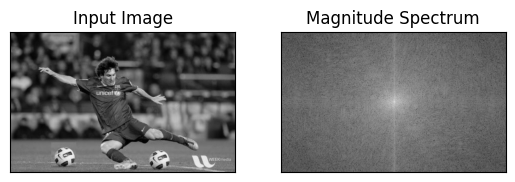

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/messi5.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, 'Cannot find image'

f = np.fft.fft2(img) # 2D Fourier Transform
fshit = np.fft.fftshift(f) # zero frequency를 중앙에 두기 위해 shift
magnitude_spectrum = 20*np.log(np.abs(fshit)) # magnitude spectrum

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

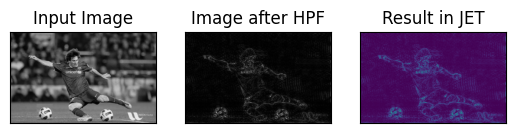

In [5]:
# High Pass Filtering
# fhsit의 중앙에 low frequency가 있고 주변에 high frequency가 있음
# Fourier transform을 통해 이미지로 역변환
img = cv.imread('Images/messi5.jpeg', cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshit = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshit[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshit)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# Fourier Transform in OpenCV
cv.dft(), cv.idft()는 2개의 채널이 있는 배열을 반환합니다. 첫 번째 채널은 결과의 real part이고, 두 번째 채널은 결과의 imaginary part입니다. 결과의 크기는 입력 이미지의 크기와 같습니다. 결과의 크기를 보기 위해서는 cv.magnitude() 함수를 사용하여 크기를 계산할 수 있습니다. 결과의 크기는 로그 슼일로 변환하여 표시할 수 있습니다. cv.idft() 함수를 사용하여 역 Fourier Transform을 계산할 수 있습니다. 결과는 복소수 배열로 반환됩니다. 결과의 실수 부분은 출력 이미지입니다. 결과의 허수 부분은 0입니다.

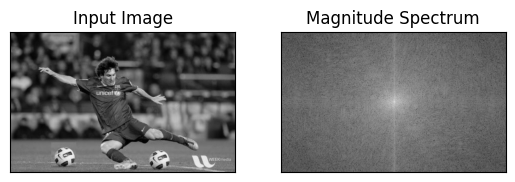

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('Images/messi5.jpeg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT) # 2D Fourier Transform
dft_shift = np.fft.fftshift(dft) # zero frequency를 중앙에 두기 위해 shift

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])) # magnitude spectrum

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

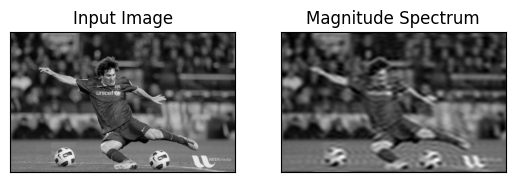

In [7]:
# inverse DFT
# High Frequenct contents가 이미지에서 제거하는 방법.
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8) 
mask[crow-30:crow+30, ccol-30:ccol+30] = 1 # mask를 만들어서 중앙 60x60 부분을 1로 설정

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1]) 

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Why Laplacian is a High Pass Filter?

Laplacian은 이미지에서 고주파수 성분을 추출하는 필터입니다. 따라서 Laplacian은 고주파수 성분을 강조하는 고주파수 필터입니다. 
Fourier transform과 그 역변환을 통해 원래의 이미지가 Edge detection이나 Blur 효과가 적용되는지 확인할 수 있습니다. 

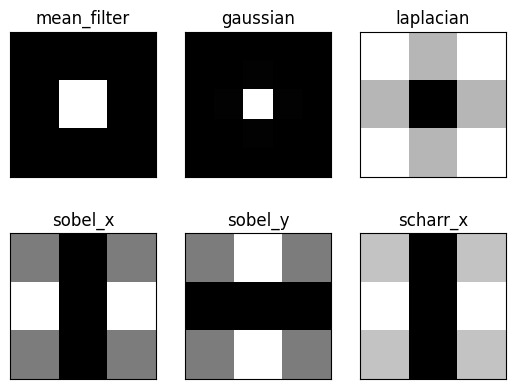

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])

# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian
laplacian = np.array([[0, 1, 0],
                      [1,-4, 1],
                      [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', 'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters] # fft.fft2()로 filter를 2D Fourier Transform
fft_shift = [np.fft.fftshift(y) for y in fft_filters] # zero frequency를 중앙에 두기 위해 shift
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift] # magnitude spectrum

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()
